In [53]:
import pandas as pd
from sklearn.datasets import load_diabetes

diabetes_dict = load_diabetes()

# Features == Attributes/Columns
data_df = pd.DataFrame(diabetes_dict["data"], columns=diabetes_dict["feature_names"])
target_df = pd.DataFrame(diabetes_dict["target"], columns=["target"])

print(data_df.head())
print(target_df.head())

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  
   target
0   151.0
1    75.0
2   141.0
3   206.0
4   135.0


In [54]:
from sklearn.model_selection import train_test_split

"""
The random_state parameter in the train_test_split function from scikit-learn controls 
the shuffling applied to the data before splitting it into training and test subsets.

Without shuffling, the order of data points matters. If the dataset has any inherent order 
(e.g., sorted by date), splitting without shuffling could introduce bias. Shuffling ensures 
that the training and test sets are representative of the overall data distribution.
"""
x_train, x_test, y_train, y_test = train_test_split(data_df, target_df, test_size=0.2, random_state=42)

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(353, 10) (89, 10)
(353, 1) (89, 1)


In [55]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
# Providing data to be trained
lr.fit(x_train, y_train)

# Predicted values of the target based on features. After training the linear regression model using the training data, 
# we use it to make predictions on new, unseen data (the test data). The y_predict array contains the model's 
# estimated diabetes progression values for each sample in the test dataset.
y_predict = lr.predict(x_test)
y_predict.shape

(89, 1)

In [56]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Measures the proportion of the variance in the dependent variable that is predictable 
# from the independent variables. It ranges from 0 to 1 (the higher, the better).
r2 = r2_score(y_test, y_predict)

# Provides an average magnitude of errors in absolute terms.
mae = mean_absolute_error(y_test, y_predict)

# Emphasizes larger errors due to squaring.
mse = mean_squared_error(y_test, y_predict)

# Represents the point where the regression line crosses the y-axis.
# It shows the baseline level of the dependent variable and is useful
# for understanding the starting point of the regression line.
intercept = lr.intercept_

print("R2 Score: ", r2)
print("Mean Absolute Error: ", mae)
print("Mean Squared Error: ", mse)
print("Intercept: ", intercept)

R2 Score:  0.4526027629719197
Mean Absolute Error:  42.79409467959994
Mean Squared Error:  2900.19362849348
Intercept:  [151.34560454]


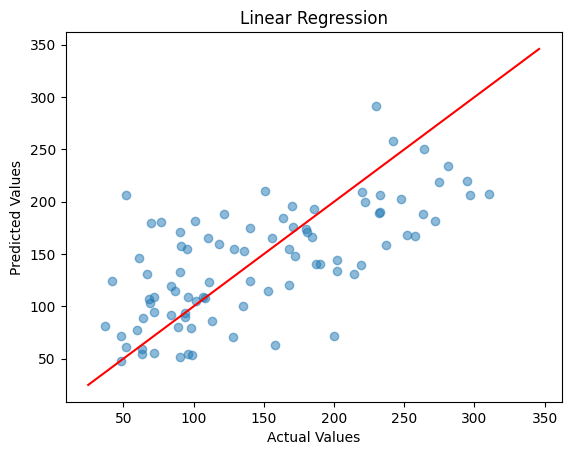

In [68]:
import matplotlib.pyplot as plt

plt.ioff()
plt.scatter(y_test, y_predict, alpha=0.5)
plt.plot([target_df.min(), target_df.max()], [target_df.min(), target_df.max()], color="red")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression")
plt.show()

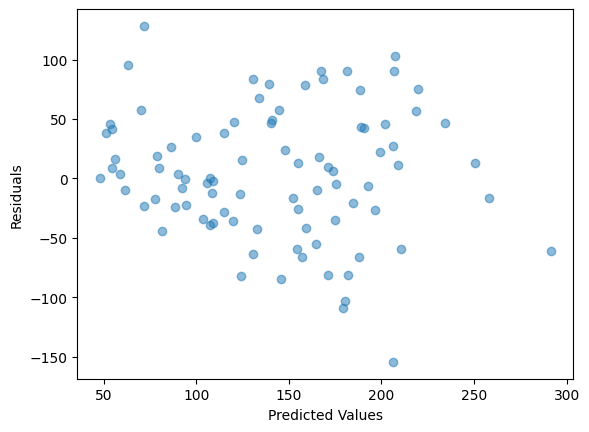

In [67]:
# Residuals are the differences between the observed actual values and the values predicted by the regression model.
# Randomly scattered residuals suggest that the model's assumptions are valid and that the model fits the data well.

plt.ioff()
plt.scatter(y_predict, y_test - y_predict, alpha=0.5)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()